<a href="https://colab.research.google.com/github/qas95/Machine-Learning/blob/main/NonLinear_MultiClass_DeepNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [ ]:
#Creating a nonlinearly separable datsets for MultiClass Classification
n_pts = 500
centers = [[-1, -1], [-1,1], [1,-1], [1,1], [0.1,-3]]
X, y = datasets.make_blobs(n_pts, random_state = 42, centers = centers, cluster_std= 0.5)

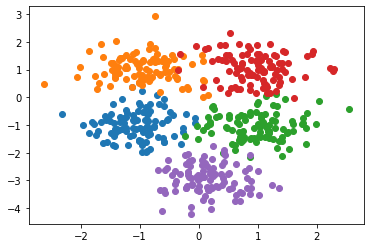

In [ ]:
#Displaying data points
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
plt.show()

In [ ]:
#One hot encoding class labels
y_cats = to_categorical(y,5)

In [ ]:
#Defining a Neural Net

model = Sequential()
adam = Adam(lr = 0.05)
model.add(Dense(5,input_shape = (2,), activation = 'softmax'))
model.compile(optimizer=adam, loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(X,y_cats, epochs=50, verbose = 1, batch_size=20)


Epoch 1/50
25/25 [==============================] - 0s 1ms/step - loss: 1.1464 - accuracy: 0.5642
Epoch 2/50
25/25 [==============================] - 0s 996us/step - loss: 0.4759 - accuracy: 0.9536
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.3219 - accuracy: 0.9546
Epoch 4/50
25/25 [==============================] - 0s 931us/step - loss: 0.2630 - accuracy: 0.9585
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.9514
Epoch 6/50
25/25 [==============================] - 0s 982us/step - loss: 0.1927 - accuracy: 0.9668
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 0.9629
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.9619
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.9612
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9455
Epoch 11/50
2

In [ ]:
#Plotting a contour plot of the decision boundary
x_span = np.linspace(X[:,0].min(), X[:,0].max())
y_span = np.linspace(X[:,1].min(), X[:,1].max())
xx, yy = np.meshgrid(x_span, y_span)
xx_ = xx.ravel()
yy_ = yy.ravel()
grid = np.c_[xx_,yy_]

preds = np.argmax(model.predict(grid), axis=-1)

In [ ]:
preds

array([0, 4, 4, ..., 3, 3, 3])

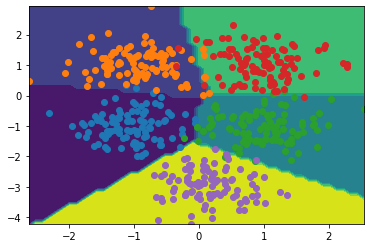

In [ ]:
plt.contourf(xx, yy, preds.reshape(xx.shape))
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
plt.show()